In [33]:
import sys
sys.path.append('..')
from options.black_scholes import BlackScholes
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('ggplot')
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['figure.titlesize'] = 18
plt.rcParams['figure.titleweight'] = 'medium'
plt.rcParams['lines.linewidth'] = 2.5

In [36]:
# initialise BlackScholes class
bs = BlackScholes('TSLA', 200, "2023-05-19", 0.04, 0.72)

[*********************100%***********************]  1 of 1 completed


/Users/jimmyyeung/Code/PyCharmProjects/Quant/notebooks/../options/black_scholes.py:67: RuntimeWarning: divide by zero encountered in log
  return (np.log(s / k) + (r + sigma ** 2 / 2) * t) / (sigma * np.sqrt(t))
/Users/jimmyyeung/Code/PyCharmProjects/Quant/notebooks/../options/black_scholes.py:120: RuntimeWarning: invalid value encountered in scalar divide
  return (norm.pdf(d1)) / (s * sigma * np.sqrt(t))


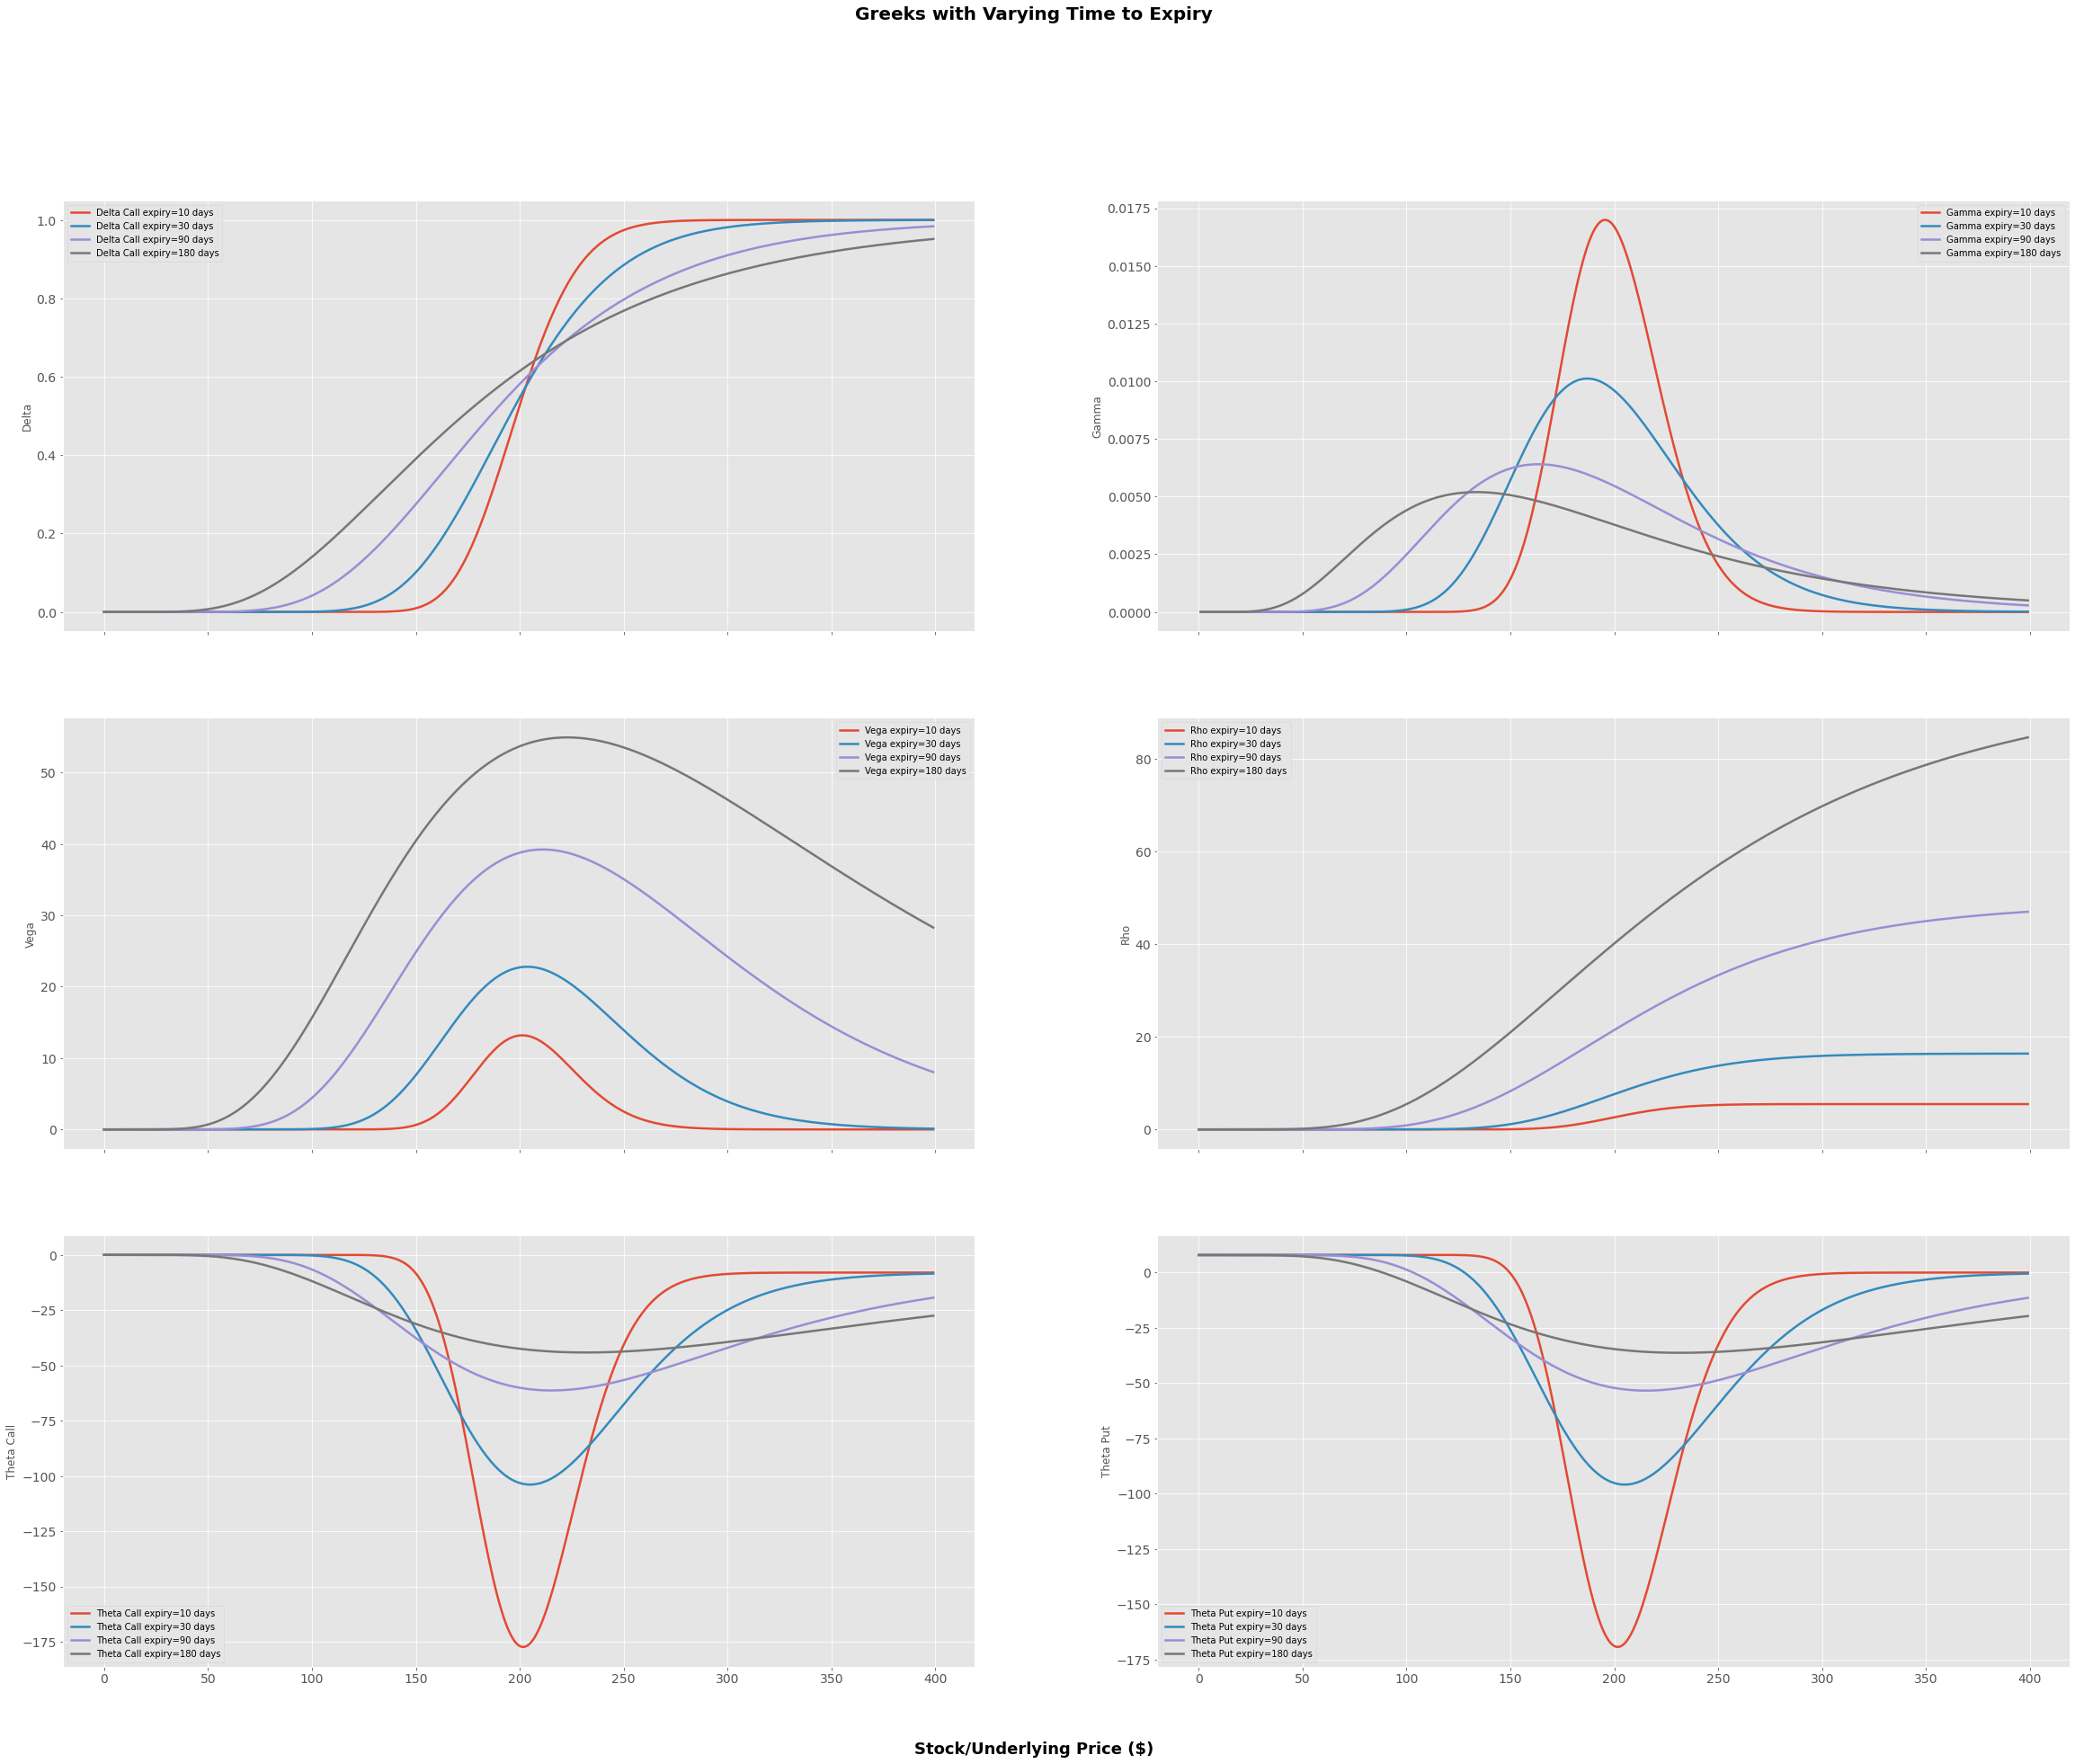

In [35]:
fig, ax = plt.subplots(nrows=3, ncols=2, sharex=True, figsize=(40, 30))
fig.suptitle('Greeks with Varying Time to Expiry', fontsize=20, fontweight='bold')
fig.text(0.5, 0.08, 'Stock/Underlying Price ($)', ha='center', fontsize=18, fontweight='bold')
expirys = [10/365, 30/365, 90/365, 180/365]

plt.subplot(321)
for expiry in expirys:
    tmp_c = [bs.delta_call(s, t=expiry) for s in np.arange(0,400)]
    plt.plot(tmp_c, label = (f"Delta Call expiry={int(expiry*365)} days"))

plt.ylabel("Delta")
plt.legend()

plt.subplot(322)
for expiry in expirys:
    tmp_c = [bs.gamma(s, t=expiry) for s in np.arange(0,400)]
    plt.plot(tmp_c, label = (f"Gamma expiry={int(expiry*365)} days"))

plt.ylabel("Gamma")
plt.legend()

plt.subplot(323)
for expiry in expirys:
    tmp_c = [bs.vega(s, t=expiry) for s in np.arange(0,400)]
    plt.plot(tmp_c, label = (f"Vega expiry={int(expiry*365)} days"))

plt.ylabel("Vega")
plt.legend()

plt.subplot(324)
for expiry in expirys:
    tmp_c = [bs.rho_call(s, t=expiry) for s in np.arange(0,400)]
    plt.plot(tmp_c, label = (f"Rho expiry={int(expiry*365)} days"))

plt.ylabel("Rho")
plt.legend()

plt.subplot(325)
for expiry in expirys:
    tmp_c = [bs.theta_call(s, t=expiry) for s in np.arange(0,400)]
    plt.plot(tmp_c, label = (f"Theta Call expiry={int(expiry*365)} days"))

plt.ylabel("Theta Call")
plt.legend()

plt.subplot(326)
for expiry in expirys:
    tmp_c = [bs.theta_put(s, t=expiry) for s in np.arange(0,400)]
    plt.plot(tmp_c, label = (f"Theta Put expiry={int(expiry*365)} days"))

plt.ylabel("Theta Put")
plt.legend()